In [1]:
# Typycal Python tools
import sys
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import os.path

import pylab
from matplotlib import pyplot, cm

# Import sci-kit learn libraries for ML: Linear Regression and SVM
from sklearn import linear_model as linMod
from sklearn import svm, grid_search

# To show plots inline
%matplotlib inline

## Example 1. Classify students into admitted/not admitted classes

Imagine a group of students taking two exams as part of the process to being admitted into university. You should look at this example as a more elaborate admission process as opposed to the tradition mean of two exams. 

### A. Plotting dataset

We begin by plotting the dataset with the corresponding labels.

In [2]:
def PlotDataTXT():
    # Read data to data frame
    df = pd.read_csv("example_1.txt")
    # Turn dataframe into matrix
    data = df.values    
    # We separate the given training set into positive (accepted) and negative (not accepted)
    # according to "1" and "0" given in the training set.
    positives  = data[data[:,2] == 1]
    negatives  = data[data[:,2] == 0]
    # We add the X and Y labels...
    pyplot.xlabel("Exam 1 score")
    pyplot.ylabel("Exam 2 score")
    # ... and set the X and Y limit values of the plot.
    pyplot.xlim([25, 105])
    pyplot.ylim([25, 105])
    # We generate the scatter plot according to the separation we just did.
    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o',
                   s=50, linewidths=1, label="Not admitted" )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+',
                   s=50, linewidths=2, label="Admitted" )
    # And add legends
    pyplot.legend()

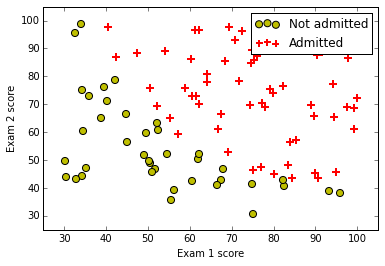

In [3]:
PlotDataTXT()

The plot suggests that we can separate the two classes with a linear boundary. Let's try to do so by means of logisit regression. We first define plotting functions to avoid extensive writing to have plotting capabilities.

### B. Auxiliary plotting functions

The following two functions generate, respectively, plots of the training set and the boundary generated by the model.

In [4]:
def plot(data):
    """
    This function plots training set with selected labels
    """
    positives = data[data[:, 2] == 1]
    negatives = data[data[:, 2] == 0]
    
    # We add the X and Y labels...
    pyplot.xlabel("Exam 1 score")
    pyplot.ylabel("Exam 2 score")
    
    pyplot.xlim([25, 105])
    pyplot.ylim([25, 105])
    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=50,
                   linewidths=1 )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+', s=50,
                   linewidths=2)
    

def PlotBoundary( X, TrainedModel ):
    """
    This function plots the boundary decision generated by the trained model
    """
    
    x1plot = np.linspace( min(X[:, 0]), max(X[:, 0]), 100 )
    x2plot = np.linspace( min(X[:, 1]), max(X[:, 1]), 100 )
    X1, X2 = np.meshgrid( x1plot, x2plot )
    
    vals = np.zeros(X1.shape) 
   
    aux_shape = X1.shape
        
    for i in range(aux_shape[1]):
        this_X = np.c_[ X1[:, i], X2[:, i] ]
        vals[:, i] = TrainedModel.predict( this_X )
    pyplot.contour( X1, X2, vals, colors='blue' )

### C. Logistic regression and its associated boundary decision

We finally generate the logistic regression model and plot its corresponding boundary decision

In [7]:
def LinRegr_Boundary(Cval):
    """
    This function reads in the reciprocal of the regularization parameter to run
    a logistic regression and plot the boundary decission.
    Note.- Smaller Cval values specify stronger regularization.
    """
    # Read data to dataframe
    df = pd.read_csv("example_1.txt")
    # Get values from it to a numpy array
    mat = df.values
    # Split data into features and labels
    X = mat[:,:2] ; y = mat[:,2]
    
    # Instantiate logistic regression
    logreg = linMod.LogisticRegression(C=Cval)
    # Fit model 
    logreg.fit(X, y )
    # Plot training set...
    plot( mat )
    # ... and resulting separating line
    PlotBoundary( X, logreg )
    

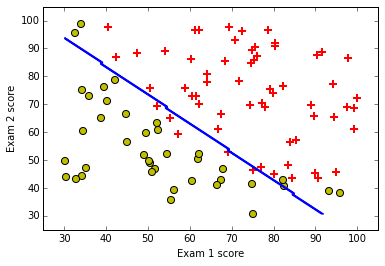

In [8]:
LinRegr_Boundary(1e2)

### D. Support vector machine (SVM) and its associated boundary decision

In [9]:
def SVM_Boundary(Cval,sigmaVal,kernel_type):
    """
    This function reads in the reciprocal of the regularization parameter to run
    a logistic regression and plot the boundary decission.
    Note.- Smaller Cval values specify stronger regularization.
    """
    # Read data to dataframe
    df = pd.read_csv("example_1.txt")
    # Get values from it to a numpy array
    mat = df.values
    # Split data into features and labels
    X = mat[:,:2] ; y = mat[:,2]
    
    # gamma is actually inverse of sigma
    svm_ = svm.SVC(C=Cval, kernel=kernel_type, gamma = 1.0 / sigmaVal ) 
    svm_.fit( X, y )


    # Plot training set...
    plot( mat )
    # ... and resulting separating line
    PlotBoundary( X, svm_ )
    

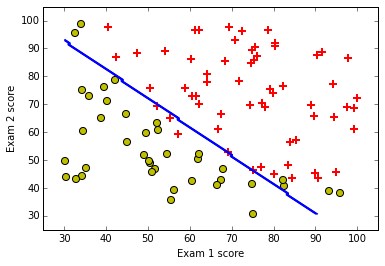

In [10]:
Cval = 10.
sigmaVal = 2000.
kernel_type = 'linear'
SVM_Boundary(Cval,sigmaVal,kernel_type)

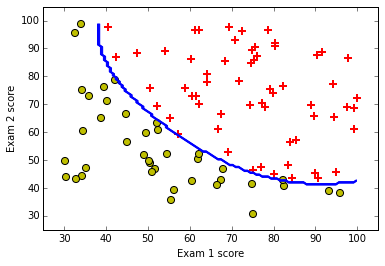

In [11]:
Cval = 10.
sigmaVal = 2000.
kernel_type = 'rbf'
SVM_Boundary(Cval,sigmaVal,kernel_type)